In [79]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

In [72]:
invert_indx_df = pd.read_json('./invert_index.json').transpose()
doc_info_df = pd.read_json('./doc_info.json').transpose()

In [73]:
invert_indx_df = invert_indx_df.sort_values(by='DF', ascending=False)
top_word_df = invert_indx_df[:10]
top_word_df = top_word_df.drop(['DocIDs','DocTF'], axis=1)

In [74]:
persons = doc_info_df['from'].unique()
person_message_count  = pd.DataFrame(doc_info_df['from'].value_counts())

In [75]:
day, hour = [], []
for row in range(len(doc_info_df)):
    date_time = doc_info_df.iloc[row]['time']
    date_time_re = re.findall('(\d{2}\.\d{2}\.\d{4})\s(\d{2}):\d{2}:\d{2}', date_time)
    day.append(date_time_re[0][0])
    hour.append(str(date_time_re[0][1]+':00'))

doc_info_df['day'] = day
doc_info_df['hour'] = hour

hour_counts = pd.DataFrame(doc_info_df['hour'].value_counts())
day_counts = pd.DataFrame(doc_info_df['day'].value_counts())
day_counts_top = day_counts[:10]
hour_counts_top = hour_counts.sort_index()

/home/hakim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


<Figure size 432x288 with 0 Axes>

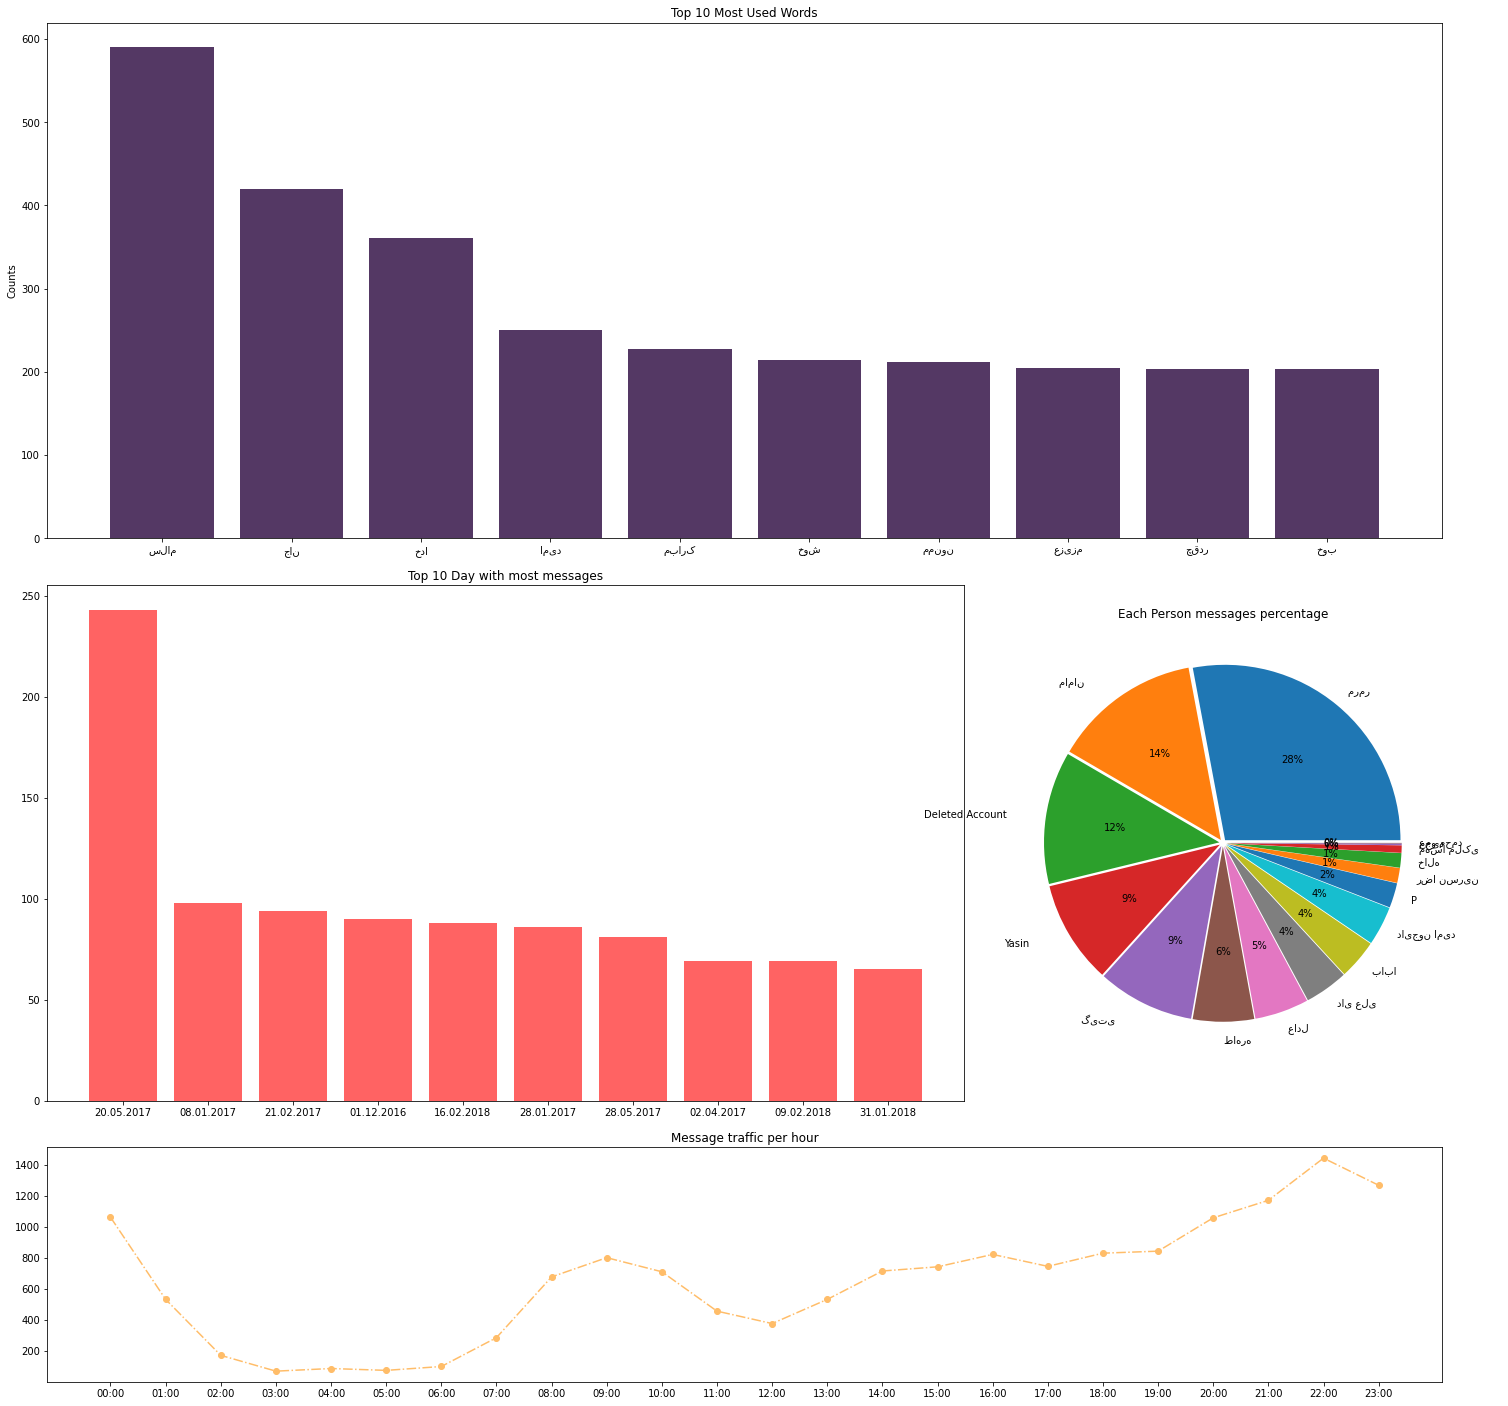

In [76]:
fig_handler = plt.figure()
plt.figure(figsize=(25,25))

# Top 10 Words
plt.subplot2grid((5,6), (0,0), colspan=6, rowspan=2)
plt.bar(top_word_df.index , top_word_df.DF, color='#543864')
plt.title('Top 10 Most Used Words')
plt.ylabel('Counts')

# Top 10 days
plt.subplot2grid((5,6), (2,0), colspan=4, rowspan=2)
plt.bar(day_counts_top.index, day_counts_top.day, color='#ff6363')
plt.title('Top 10 Day with most messages')

# Each person messages percentage
plt.subplot2grid((5,6), (2,4), colspan=2, rowspan=2)
plt.pie(person_message_count, labels=persons, autopct='%1.0f%%', explode=[0.02 for i in range(len(persons))])
plt.title('Each Person messages percentage')

# Message Traffic per hour
plt.subplot2grid((5,6), (4,0), colspan=6)
plt.plot(hour_counts_top.index,hour_counts_top.hour, color='#ffbd69', marker='o', ls='-.')
plt.title('Message traffic per hour')

plot_name = './' + str(datetime.now()) + '.png'
plt.savefig(plot_name)

In [78]:
###### plot_img_pick_load = pickle.loads(plot_img_pick)
plot_img_pick_load = pickle.loads(plot_img_pick)
cv2.imwrite() plot_img_pick_load

SyntaxError: invalid syntax (<ipython-input-78-15af15f373d8>, line 3)